In [1]:
from platform import python_version
import logging
from platform import python_version
import main.hist.gshm as gshm
import main.hist.cgshm as cgshm
import main.visualization.plotting as plotting

import importlib
import seaborn as sns

sns.set_theme(font_scale=1.5, rc={'text.usetex' : True})
from src.main.util.logging_utils import init_logger

logger = init_logger(logging.INFO)
if python_version() <= "3.10":
    logger.warning("This script has only been tested on python 3.9. Detected: {}".format(python_version()))

import numpy as np
from math import *
import matplotlib.pyplot as plt

## Plot 1: Privacy Curves as in the previous paper.

We use the exact parameters they have and investigate the influence of the different parts of the delta.

## Reference Work: Exact analsis

$\begin{align*}
    \max \bigg[ &1 - \Phi \left( \frac{\tau}{\sigma} \right)^k, \\
    &\max_{j \in [k]} 1 - \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} + \Phi \left( \frac{\tau}{\sigma} \right)^{k - j} \left[ \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon - \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon - \gamma)\sigma}{\sqrt{j}}\right) \right], \\
    &\max_{j \in [k]} \Phi\left(\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right) - e^{\varepsilon + \gamma} \Phi\left(-\frac{\sqrt{j}}{2\sigma} - \frac{(\varepsilon + \gamma)\sigma}{\sqrt{j}}\right)
    \bigg]
    \leq \delta ,
\end{align*}$

In [ ]:
importlib.reload(cgshm)
importlib.reload(gshm)
importlib.reload(plotting)

logging.getLogger('src.main.hist.gshm').setLevel(logging.DEBUG)
logging.getLogger('src.main.hist.cgshm').setLevel(logging.DEBUG)

n=30
epsilon = 0.35
delta = 10**-5
k = 51914 # C_u in the reference paper
k = 1000# C_u in the paper
max_sigma = 500

tau_exact_uncorrelated = gshm.compute_threshold_curve_tighter(delta, epsilon, k, datapoints=n, max_sigma=max_sigma)
tau_tighter_correlated = cgshm.compute_threshold_curve_tighter(delta, epsilon, k,max_sigma=max_sigma, datapoints=n)

logger.info("... Computing the rest ...")
sigmas_correlated = np.linspace(1, max_sigma, 50000)
sigmas_uncorrelated = np.linspace(1, max_sigma, 50000)
tau_add_deltas_correlated = [cgshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas_correlated]
tau_add_deltas_uncorrelated = [gshm.threshold_add_the_delta(delta, epsilon, k, sig) for sig in sigmas_uncorrelated]

logger.info(f'Scaling factor because of correlated noise: {1+1/sqrt(k)}')
sigmas_correlated = sigmas_correlated * (1+1/sqrt(k))

plotting.plot(sigmas_correlated,sigmas_uncorrelated, tau_add_deltas_correlated, tau_tighter_correlated, tau_exact_uncorrelated, tau_add_deltas_uncorrelated, meta_params={'k': k, 'eps': epsilon})


 2024-12-08 21:37:14,778 - DEBUG - Working on 1/30
 2024-12-08 21:37:15,308 - DEBUG - Working on 2/30
 2024-12-08 21:37:15,553 - DEBUG - Working on 3/30
 2024-12-08 21:37:15,791 - DEBUG - Working on 4/30
 2024-12-08 21:37:16,015 - DEBUG - Working on 5/30
 2024-12-08 21:37:16,312 - DEBUG - Working on 6/30
 2024-12-08 21:37:16,556 - DEBUG - Working on 7/30


In [ ]:

importlib.reload(plotting)
plotting.plot(sigmas_correlated,sigmas_uncorrelated, tau_add_deltas_correlated, tau_tighter_correlated, tau_exact_uncorrelated, tau_add_deltas_uncorrelated, meta_params={'k': k, 'eps': epsilon})


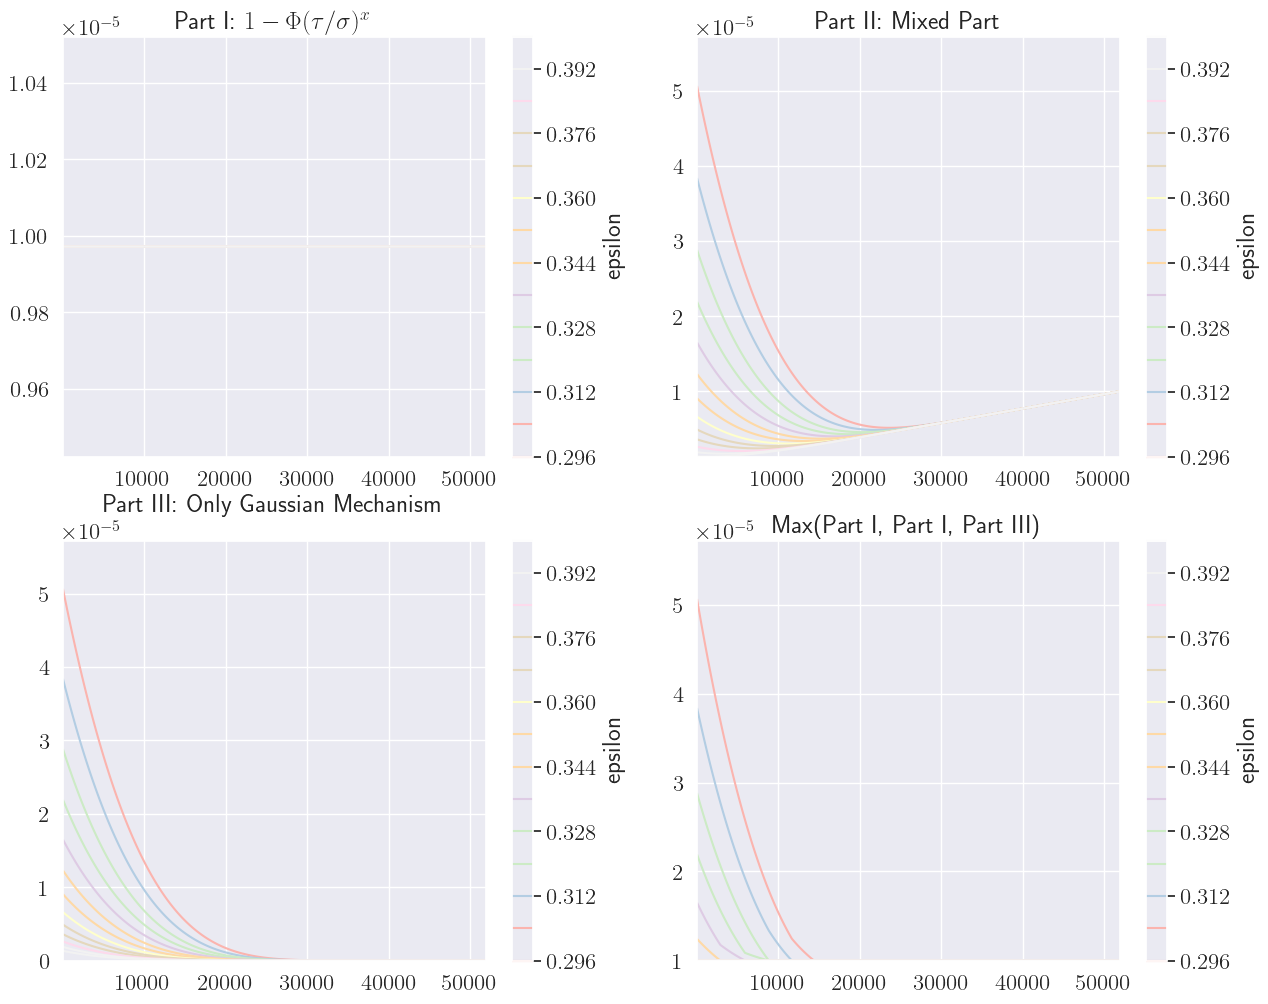

In [28]:
X, Y = np.meshgrid(range(1, c_u + 1), epsilon_range)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,all_results_part1,Y, levels=15, cmap="Pastel1")

#ax2 = fig.add_subplot()
CS1 = ax1.contour(X,part1,Y, levels=15, cmap="Pastel1")
ax1.set_title('Part I: $1-\\Phi(\\tau/\\sigma)^x$')
#ax1.set(ylim=(0,3))
plt.colorbar(CS1, label="epsilon")

CS2 = ax2.contour(X,part2,Y, levels=15, cmap="Pastel1")
ax2.set_title('Part II: Mixed Part')
#ax2.set(ylim=(0,3))
plt.colorbar(CS2, label="epsilon")

CS3 = ax3.contour(X,part3,Y, levels=15, cmap="Pastel1")
ax3.set_title('Part III: Only Gaussian Mechanism')
#ax3.set(ylim=(0,3))
plt.colorbar(CS3, label="epsilon")


#ax4.set_ylim(0,3)
CS4 = ax4.contour(X,maximum,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS4, label="epsilon")
ax4.set_title('Max(Part I, Part I, Part III)')
ax4.set_visible(True)

#plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
#plt.title('Deep Dive Th 5.4')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.show()

